In [1]:
from edc import check_compatibility
check_compatibility("user-0.21.2")

# How to access IACS Spatial Data

_Easily access publicly available georeferenced LPIS/GSAA data in a homogenised format through the [marketplace](https://eurodatacube.com/marketplace)._

In this notebook, you will be guided through the steps to access LPIS/GSAA data purchased through the [IACS Spatial Data](link) tile in the Marketplace.

In [2]:
# Import libraries
from edc import setup_environment_variables
from xcube_geodb.core.geodb import GeoDBClient
import pandas as pd

## 1. List available collections

In the following steps we will list the `geodb` collections that are available to you. By default, a certain number of collections are available freely for demonstration purposes. Once you have purchased the data for a or multiple EU member states, the collections will appear in the list.

### Automatically setup credentials

With the following command, you can automatically inject your Euro Data Cube credentials into your workspace.

In [3]:
setup_environment_variables()

API credentials have automatically been injected for your active subscriptions.  
The following environment variables are now available:
* `GEODB_API_SERVER_PORT`, `GEODB_API_SERVER_URL`, `GEODB_AUTH_AUD`, `GEODB_AUTH_CLIENT_ID`, `GEODB_AUTH_CLIENT_SECRET`, `GEODB_AUTH_DOMAIN`

The following additional environment variables have been loaded from `~/custom.env`:
* `AWS_BUCKET`
* `DAPA_URL`
* `DB_HOST`, `DB_NAME`, `DB_PASSWORD`, `DB_USER`
* `OGC_EDC_URL`
* `REFERENCE_DATA`


### Fetch the GeoDB client

In [4]:
geodb = GeoDBClient()

### Check your username

In the next cell we will print our `geodb` username.

In [5]:
geodb.whoami

'geodb_418dfeac-15f0-4606-9edb-fd9eb722bf04'

### List the collections currently accessible in the `lpis_iacs` database

Even if you haven't yet purchased the access to a collection, you should be able to see the free datasets available for demonstration purposes.

In [6]:
my_collection = geodb.get_my_collections(database="lpis_iacs")

# Print list of collections accessible
my_collection

,owner,database,table_name
0,anja,lpis_iacs,denmark_lpis_2020
1,anja,lpis_iacs,land_use_slo
2,anja,lpis_iacs,lpis_slo


## 2. Access a specific collection

Now that we have listed the available collections, we will see how to access a specific collection. For further information on how to manipulate the collection, you can refer to the following tutorial notebooks:

- [GeoDB: Manage Datasets](https://eurodatacube.com/marketplace/notebooks/getting-started/EDC_GeoDB_1_manage-datasets.ipynb)
- [GeoDB: Explore Datasets](https://eurodatacube.com/marketplace/notebooks/getting-started/EDC_GeoDB_2_explore-datasets.ipynb)
- [GeoDB: Sharing Data](https://eurodatacube.com/marketplace/notebooks/getting-started/EDC_GeoDB_3_share-datasets.ipynb)

For this example, we will access a free demonstration dataset called `land_use_slo` in the `lpis_iacs` database. This dataset represents Land Use / Land Cover for Slovenia in 2018. Since it is a large collection, we will limit the request to the first 20 entries. 

In [7]:
gdf = geodb.get_collection_pg('land_use_slo', database='lpis_iacs', limit=20)

### Print the requested dataset

In [8]:
gdf

,id,raba_pid,raba_id,d_od,d_update,geometry
0,4328240,4500192,1300,2016-11-21,2018-03-31,"POLYGON ((526560.447 141485.147, 526587.001 14..."
1,4328241,3435818,1500,2017-01-24,2018-03-31,"POLYGON ((584834.317 186199.247, 584838.220 18..."
2,4328242,4168419,1100,2017-12-01,2018-03-31,"POLYGON ((445255.608 75755.223, 445251.049 757..."
3,4328243,4168445,1100,2017-10-20,2018-03-31,"POLYGON ((401632.203 77067.863, 401607.213 770..."
4,4328244,4500348,1100,2016-09-01,2018-03-31,"POLYGON ((563119.918 127786.927, 563139.243 12..."
5,4328245,3209652,1600,2016-10-04,2018-03-31,"POLYGON ((552757.325 143377.568, 552756.092 14..."
6,4328273,3237251,1300,2016-11-07,2018-03-31,"POLYGON ((592623.483 171213.226, 592614.363 17..."
7,4328952,4336181,3000,2016-11-02,2018-03-31,"POLYGON ((577105.154 163222.951, 577109.986 16..."
8,4328249,4398105,3000,2017-02-01,2018-03-31,"POLYGON ((511631.488 160019.702, 511631.491 16..."
9,4328274,3237252,1100,2016-11-07,2018-03-31,"POLYGON ((592624.728 171106.184, 592596.889 17..."


### Plot the collection based on a specific column

First, we will query the dataset for a given area, using the `get_collection_by_bbox` method.

In [9]:
# Get bounding box coordinates for Ljubljiana in EPSG: 3794
lju_coords = (456543, 99294, 460617, 103213)


# Fetch collection in the given bounding box
gdf_lju = geodb.get_collection_by_bbox('land_use_slo', database='lpis_iacs', bbox = lju_coords, comparison_mode="contains", bbox_crs=3794)

Then we can easily plot the sampled data by one of it's attributes.

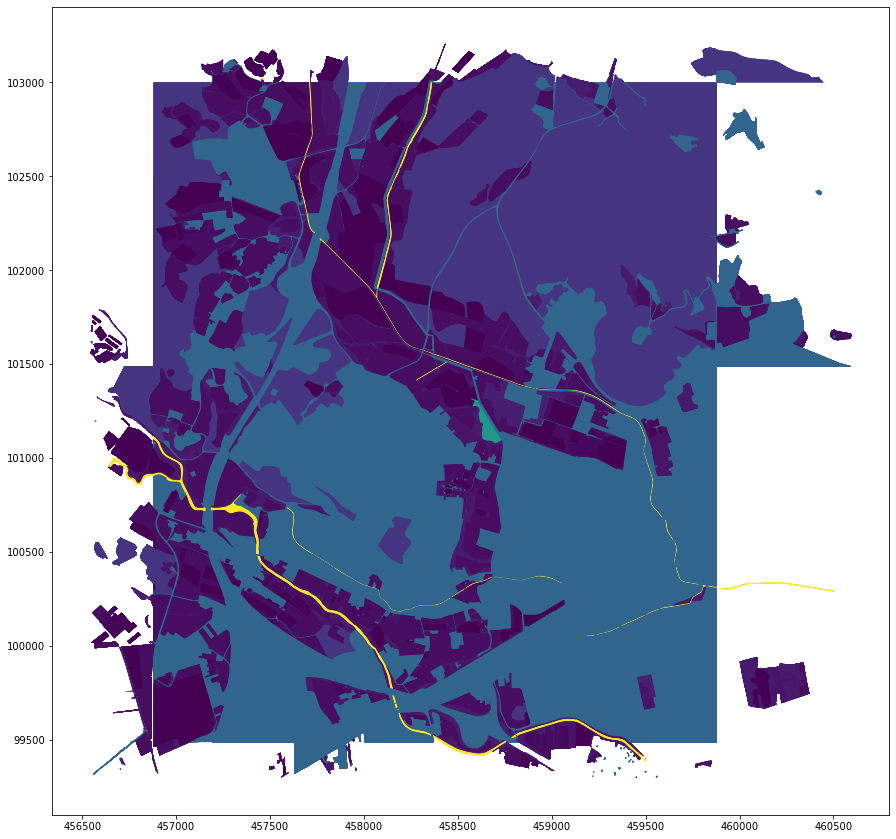

In [10]:
gdf_lju.plot(column="raba_id", figsize=(15,15), cmap = 'viridis')